# Задание
1. Соберите данные о погоде в разных городах мира за последний месяц. Используйте открытые источники данных, такие как API погодных сервисов или веб-скрейпинг.
2. Выведете график изменения температуры в разных городах, график распределения температуры.
3. Сохранить результаты в HDFS
4. Выгрузить результаты из HDFS на локальный компьютер.

In [64]:
!pip install requests pd matplotlib hdfs
!pip install seaborn

In [65]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from hdfs import InsecureClient
import json
import seaborn as sns

In [66]:
API_KEY = 'bfb904424b2f4ce9823132243242007'
BASE_URL = 'http://api.weatherapi.com/v1/'


CITIES = [
    'New York', 'London', 'Tokyo', 'Moscow', 'Sydney', 'Paris',
    'Berlin', 'Beijing', 'Mumbai', 'Cape Town', 'Rio de Janeiro']

def get_weather_data(city):
    url = f"{BASE_URL}current.json?key={API_KEY}&q={city}"
    response = requests.get(url)
    return response.json()

data = []

for city in CITIES:
    weather_data = get_weather_data(city)
    if 'current' in weather_data:
        data.append({
            'city': weather_data['location']['name'],
            'temperature': weather_data['current']['temp_c'],
            'condition': weather_data['current']['condition']['text'],
            'date': weather_data['location']['localtime']
        })

df = pd.DataFrame(data)
print(df)

              city  temperature                       condition  \
0         New York         25.1                           Sunny   
1           London         22.0                   Partly cloudy   
2            Tokyo         27.2  Patchy light rain with thunder   
3           Moscow         23.1                   Partly cloudy   
4           Sydney         13.0                           Clear   
5            Paris         30.3                           Sunny   
6           Berlin         30.1                           Sunny   
7          Beijing         31.4                           Clear   
8           Mumbai         27.2                      Light rain   
9        Cape Town         13.2                   Partly cloudy   
10  Rio De Janeiro         22.3                   Partly cloudy   

                date  
0    2024-07-20 9:55  
1   2024-07-20 14:55  
2   2024-07-20 22:55  
3   2024-07-20 16:55  
4   2024-07-20 23:55  
5   2024-07-20 15:57  
6   2024-07-20 15:57  
7   2024-07

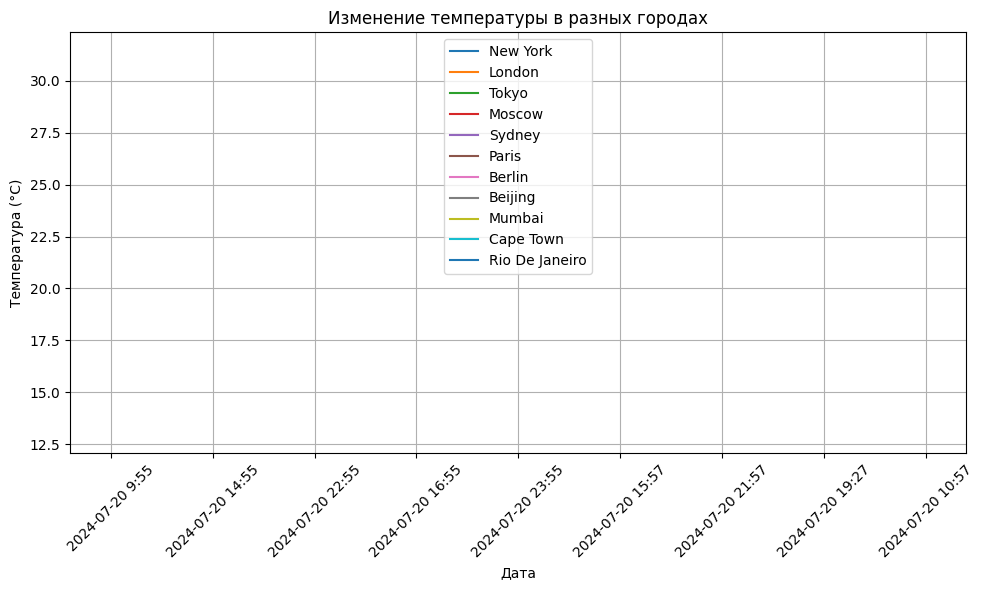

In [67]:
# График изменения температуры
plt.figure(figsize=(10, 6))
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    plt.plot(city_data['date'], city_data['temperature'], label=city)
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Изменение температуры в разных городах')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

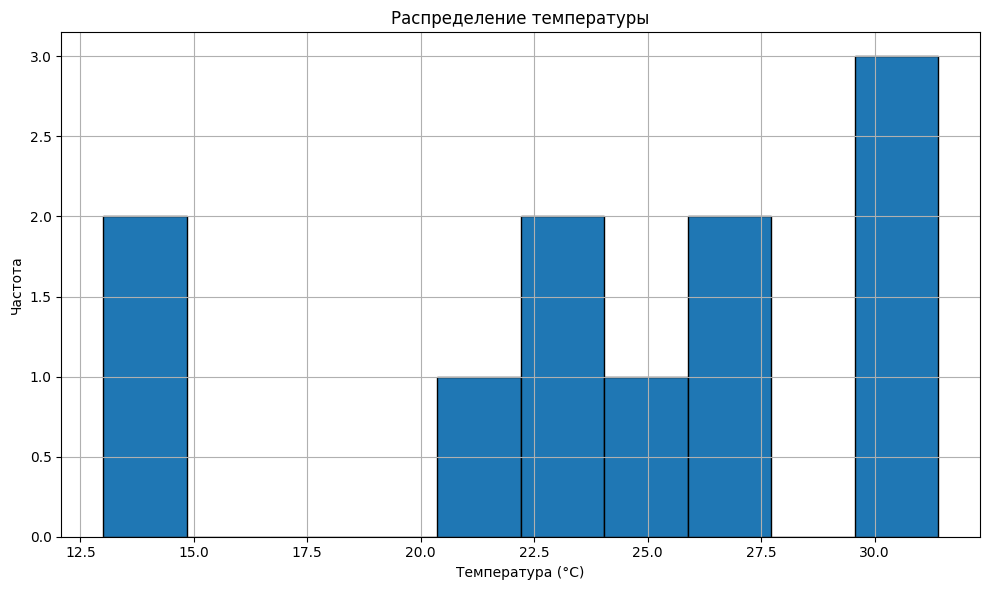

In [68]:
# График распределения температуры
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=10, edgecolor='black')
plt.xlabel('Температура (°C)')
plt.ylabel('Частота')
plt.title('Распределение температуры')
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
# Подключение к HDFS
hdfs_client = InsecureClient('http://localhost:50070', user='hdfs')



In [75]:
# Сохранение данных в HDFS
df.to_csv('weather_data.csv', index=False)
with open('weather_data.csv', 'rb') as f:
    hdfs_client.write('/user/weather_data/weather_data.csv', f, overwrite=True

SyntaxError: incomplete input (<ipython-input-75-59d3464f4871>, line 4)

In [73]:
# Загрузка данных из HDFS на локальный компьютер
with hdfs_client.read('/user/weather_data/weather_data.csv') as reader:
    with open('downloaded_weather_data.csv', 'wb') as f:
        f.write(reader.read())

ConnectionError: HTTPConnectionPool(host='localhost', port=50070): Max retries exceeded with url: /webhdfs/v1/user/weather_data/weather_data.csv?user.name=hdfs&offset=0&op=OPEN (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x79a35950afb0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [74]:
# Данные скачиваются на локальный диск Google Colab, оттуда их можно скачать на локальный компьютер.
from google.colab import files
files.download('downloaded_weather_data.csv')

FileNotFoundError: Cannot find file: downloaded_weather_data.csv